**Week3 Lab Experiment**

Python implementation of a backward propagation neural network for two-class classification using:

- A single hidden layer

- Tanh activation for hidden layer

- Sigmoid activation for output

- Cross-entropy loss function

- Manual implementation of forward and backward propagation

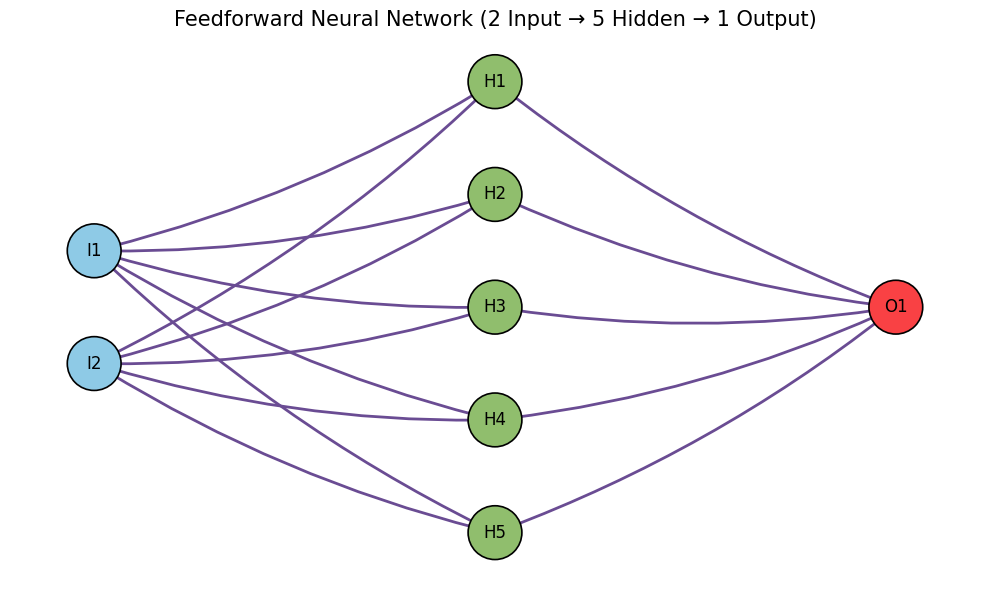

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Define layer sizes
input_size = 2
hidden_size = 5
output_size = 1

# Create directed graph
G = nx.DiGraph()

# Define node labels
input_nodes = [f"I{i+1}" for i in range(input_size)]
hidden_nodes = [f"H{j+1}" for j in range(hidden_size)]
output_nodes = [f"O{k+1}" for k in range(output_size)]

# Add nodes with 'layer' attribute
for n in input_nodes:
    G.add_node(n, layer="Input")

for n in hidden_nodes:
    G.add_node(n, layer="Hidden")

for n in output_nodes:
    G.add_node(n, layer="Output")

# Add edges (without weights)
for i in input_nodes:
    for h in hidden_nodes:
        G.add_edge(i, h)

for h in hidden_nodes:
    for o in output_nodes:
        G.add_edge(h, o)

# Assign positions for a clean layout
def layer_pos(nodes, x_layer, y_gap=1.2):
    total = len(nodes)
    return {
        node: (x_layer, -i * y_gap + y_gap * (total - 1) / 2)
        for i, node in enumerate(nodes)
    }

pos = {}
pos.update(layer_pos(input_nodes, 0))
pos.update(layer_pos(hidden_nodes, 1))
pos.update(layer_pos(output_nodes, 2))

# Define node colors by layer
layer_colors = {
    "Input": "#8ecae6",   # sky blue
    "Hidden": "#90be6d",  # green
    "Output": "#f94144"   # red
}
node_colors = [layer_colors[G.nodes[n]["layer"]] for n in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1500, edgecolors='black', linewidths=1.2)
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')
nx.draw_networkx_edges(G, pos, width=2, edge_color="#6a4c93", arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.08')

plt.title("Feedforward Neural Network (2 Input → 5 Hidden → 1 Output)", fontsize=15)
plt.axis("off")
plt.tight_layout()
plt.show()
